In [76]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from gluonts.dataset.common import ListDataset
from gluonts.model.predictor import Predictor
from gluonts.dataset.field_names import FieldName
from gluonts.evaluation import make_evaluation_predictions

In [89]:
level_idx = 2
estimator_name = 'TFT'

dataset_path = f'../dataset/tft/dataset_level_{level_idx}.pkl'

result_dir = '../result'
level_dir = os.path.join(result_dir, f'level {level_idx}')
model_dirs = [d for d in os.listdir(level_dir) if d.startswith(f'{estimator_name}_')]
model_dir = os.path.join(level_dir, model_dirs[0])

In [90]:
with open(dataset_path, 'rb') as f:
    dataset = pickle.load(f)
dataset = dataset['test']

predictor = Predictor.deserialize(Path(model_dir))

In [91]:
time_series_length = len(dataset[0][FieldName.TARGET])
window_size = 56
stride = 28

num_rolling_windows = (time_series_length - window_size) // stride + 1

In [92]:
labels = {dataset[i][FieldName.ITEM_ID]: [] for i in range(len(dataset))}
forecasts = {dataset[i][FieldName.ITEM_ID]: [] for i in range(len(dataset))}

for rolling_window in range(num_rolling_windows):
    rolling_window_data = []

    context = rolling_window * stride
    offset = rolling_window * stride + window_size // 2
    prediction = rolling_window * stride + window_size
    print(f'{context} -> {prediction}')
    
    for item_idx in range(len(dataset)):
        item = dataset[item_idx]

        rolling_window_data.append({
            FieldName.ITEM_ID: item[FieldName.ITEM_ID],
            FieldName.TARGET: item[FieldName.TARGET][context:prediction],
            FieldName.START: item[FieldName.START] + context,
            'id': item['id'],
            'sales_mean': item['sales_mean'][:, context:prediction], 
            'sales_std': item['sales_std'][:, context:prediction],
            'sales_max': item['sales_max'][:, context:prediction],
            'sales_min': item['sales_min'][:, context:prediction],
            'sales_diff_mean': item['sales_diff_mean'][:, context:prediction],
            'sales_lag1_mean': item['sales_lag1_mean'][:, context:prediction],
            'sales_lag7_mean': item['sales_lag7_mean'][:, context:prediction],
            'sales_lag28_mean': item['sales_lag28_mean'][:, context:prediction],
            'sales_rolling7_mean': item['sales_rolling7_mean'][:, context:prediction],
            'sales_rolling28_mean': item['sales_rolling28_mean'][:, context:prediction],
            'sales_rolling7_diff_mean': item['sales_rolling7_diff_mean'][:, context:prediction],
            'sales_rolling28_diff_mean': item['sales_rolling28_diff_mean'][:, context:prediction],
            'release_mean': item['release_mean'][:, context:prediction],
            'out_of_stock_mean': item['out_of_stock_mean'][:, context:prediction],
            'sell_price_mean': item['sell_price_mean'][:, context:prediction],
            'sell_price_std': item['sell_price_std'][:, context:prediction],
            'sell_price_max': item['sell_price_max'][:, context:prediction],
            'sell_price_min': item['sell_price_min'][:, context:prediction],
            'sell_price_diff_mean': item['sell_price_diff_mean'][:, context:prediction],
            'sell_price_lag_mean': item['sell_price_lag_mean'][:, context:prediction],
            'sell_price_rolling_mean': item['sell_price_rolling_mean'][:, context:prediction],
            'sell_price_rolling_diff_mean': item['sell_price_rolling_diff_mean'][:, context:prediction],
            'sell_price_in_store_mean': item['sell_price_in_store_mean'][:, context:prediction],
            'year_delta': item['year_delta'][:, context:prediction],
            'quarter_sin': item['quarter_sin'][:, context:prediction],
            'quarter_cos': item['quarter_cos'][:, context:prediction],
            'month_sin': item['month_sin'][:, context:prediction],
            'month_cos': item['month_cos'][:, context:prediction],
            'day_sin': item['day_sin'][:, context:prediction],
            'day_cos': item['day_cos'][:, context:prediction],
            'weekday_sin': item['weekday_sin'][:, context:prediction],
            'weekday_cos': item['weekday_cos'][:, context:prediction],
            'event_count': item['event_count'][:, context:prediction],
            'snap_CA': item['snap_CA'][context:prediction],
            'snap_TX': item['snap_TX'][context:prediction],
            'snap_WI': item['snap_WI'][context:prediction],
            'event_name_1_enc': item['event_name_1_enc'][context:prediction],
            'event_name_2_enc': item['event_name_2_enc'][context:prediction],
            'event_type_1_enc': item['event_type_1_enc'][context:prediction],
            'event_type_2_enc': item['event_type_2_enc'][context:prediction]
        })
    rolling_window_datasset = ListDataset(rolling_window_data, freq="D")
    
    rolling_window_forecasts_it, rolling_window_labels_it = make_evaluation_predictions(
        dataset=rolling_window_datasset,
        predictor=predictor,
        num_samples=1
    )
    rolling_window_forecasts = list(rolling_window_forecasts_it) # 28
    rolling_window_labels = list(rolling_window_labels_it) # 28

    for i, (forecast, label) in enumerate(zip(rolling_window_forecasts, rolling_window_labels)):
        item_id = dataset[i][FieldName.ITEM_ID]
        forecasts[item_id].append(forecast)
        labels[item_id].append(label)

0 -> 56
28 -> 84
56 -> 112
84 -> 140
112 -> 168
140 -> 196
168 -> 224
196 -> 252
224 -> 280
252 -> 308
280 -> 336
308 -> 364
336 -> 392
364 -> 420
392 -> 448
420 -> 476
448 -> 504
476 -> 532
504 -> 560
532 -> 588
560 -> 616
588 -> 644
616 -> 672
644 -> 700
672 -> 728
700 -> 756
728 -> 784
756 -> 812
784 -> 840
812 -> 868
840 -> 896
868 -> 924
896 -> 952
924 -> 980
952 -> 1008
980 -> 1036
1008 -> 1064
1036 -> 1092
1064 -> 1120
1092 -> 1148
1120 -> 1176
1148 -> 1204
1176 -> 1232
1204 -> 1260
1232 -> 1288
1260 -> 1316
1288 -> 1344
1316 -> 1372
1344 -> 1400
1372 -> 1428
1400 -> 1456
1428 -> 1484
1456 -> 1512
1484 -> 1540
1512 -> 1568
1540 -> 1596
1568 -> 1624
1596 -> 1652
1624 -> 1680
1652 -> 1708
1680 -> 1736
1708 -> 1764
1736 -> 1792
1764 -> 1820
1792 -> 1848
1820 -> 1876
1848 -> 1904
1876 -> 1932


In [93]:
item_ids = list(labels.keys())
dfs = {item_id: pd.DataFrame() for item_id in item_ids}

for item_id in item_ids:
    dfs[item_id]['date'] = [
        value
        for i, label in enumerate(labels[item_id])
        for value in (
            label.index.values if i == len(labels[item_id]) - 1 else label.index.values[:window_size // 2]
        )
    ]

    dfs[item_id]['label'] = [
        value
        for i, label in enumerate(labels[item_id])
        for value in (
            label.values.squeeze() if i == len(labels[item_id]) - 1 else label.values.squeeze()[:window_size // 2]
        )
    ]
    dfs[item_id]['forecast'] = [np.nan] * 28 + [
        value 
        for forecast in forecasts[item_id] 
        for value in forecast.quantile(0.5)
    ]

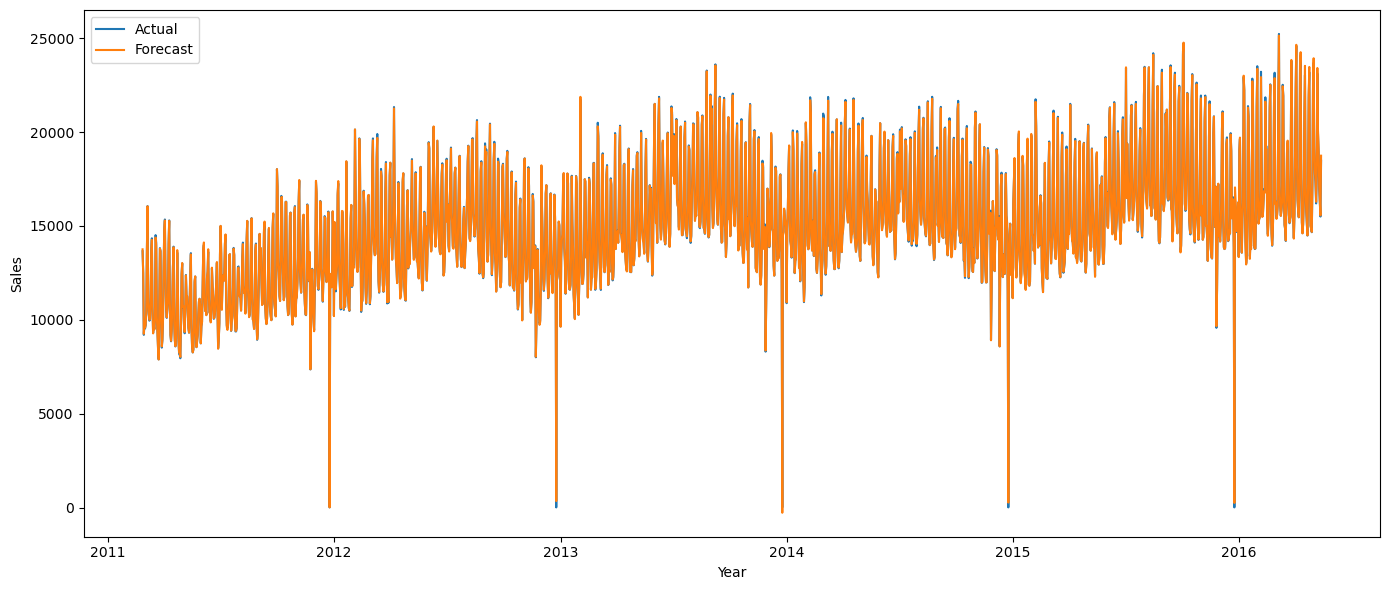

In [95]:
df = dfs['CA']

df = df.iloc[28:].copy()
df['date'] = df['date'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
plt.plot(df['date'].values, df['label'].values, label='Actual')
plt.plot(df['date'].values, df['forecast'].values, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error

df = dfs['WI']

df = df.iloc[28:].copy()
df = df.dropna(subset=['label', 'forecast'])

mse = mean_squared_error(df['label'], df['forecast'])
print(mse)

2519.630408128551


In [102]:
dfs['WI'].iloc[-28:,]

,date,label,forecast
1904,2016-04-16,15338.0,15683.774414
1905,2016-04-17,14899.0,15126.931641
1906,2016-04-18,11139.0,11111.513672
1907,2016-04-19,10864.0,10825.469727
1908,2016-04-20,10595.0,10554.061523
1909,2016-04-21,10943.0,10949.691406
1910,2016-04-22,12807.0,12870.834961
1911,2016-04-23,14862.0,15004.248047
1912,2016-04-24,14326.0,14528.120117
1913,2016-04-25,10607.0,10566.466797


In [105]:
test_forecasts_path = f'{model_dir}/test_forecasts.pkl'
test_labels_path = f'{model_dir}/test_labels.pkl'

with open(test_forecasts_path, 'rb') as f:
    test_forecasts = pickle.load(f)
with open(test_labels_path, 'rb') as f:
    test_labels = pickle.load(f)

test_df = pd.DataFrame()

test_df['date'] = test_labels[2].index.values[-28:]
test_df['label'] = test_labels[2].values.squeeze()[-28:]
test_df['forecast'] = test_forecasts[2].quantile(0.5)

test_df

,date,label,forecast
0,2016-04-16,15338.0,15683.774414
1,2016-04-17,14899.0,15126.931641
2,2016-04-18,11139.0,11111.513672
3,2016-04-19,10864.0,10825.469727
4,2016-04-20,10595.0,10554.061523
5,2016-04-21,10943.0,10949.691406
6,2016-04-22,12807.0,12870.834961
7,2016-04-23,14862.0,15004.248047
8,2016-04-24,14326.0,14528.120117
9,2016-04-25,10607.0,10566.466797
